In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# PCA with images

## PCA Review

1. What does "PCA" stand for?
2. What does PCA *do*?
3. In what circumstances might you use PCA?

Today's notebook is a modification of https://charlesreid1.github.io/circe/Digit%20Classification%20-%20PCA.html

## Handwritten Digits Data Set

The data set we wil be analyzing is a well known data set for handwriting recognition from https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits.

__Take a look at the data__.

*The independent variables*: each data point (observation) is an 8 pixel by 8 pixel grayscale image. We flatten this so each data point is represented by a 64 floating point one dimensional array. 

*The dependent variable*: the label is the number in the image, 0 ... 9.

*Reason for using PCA*: if we can project from 64 dimensions down to some number less than 10, we can fit a regression (or other!) model more efficiently.

### Load and separate and examine the training data

In [2]:
train = np.array(np.genfromtxt('data/optdigits/optdigits.tra', delimiter=',', dtype=int))  
print(train.shape)

(3823, 65)


In [3]:
# Let's split off the labels
def split(data, ycol):
    y = data[:, ycol]
    xfirst = data[:, 0:ycol]
    xsecond = data[:, ycol+1:data.shape[1]]
    return (np.hstack((xfirst, xsecond)), y)

In [4]:
(x, y) = split(train, train.shape[1]-1)
print(y.shape, x.shape)

(3823,) (3823, 64)


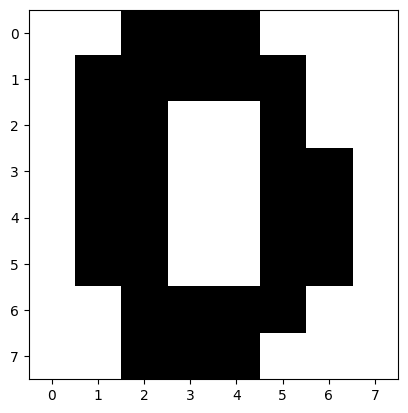

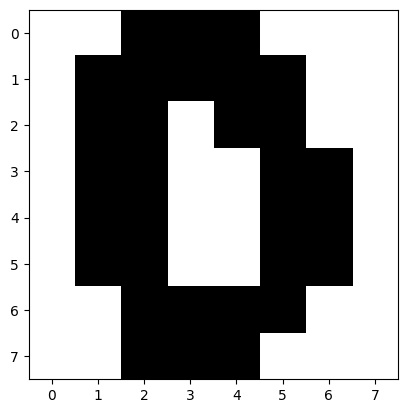

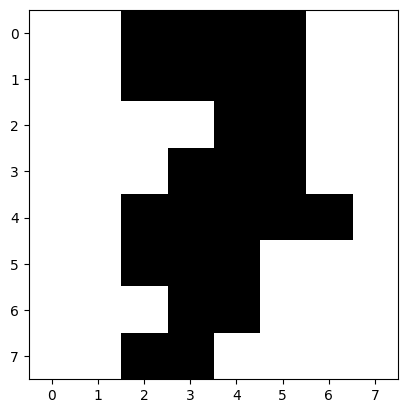

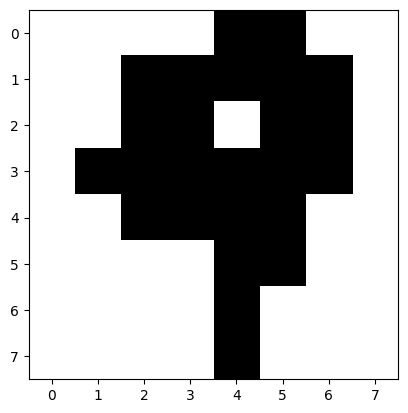

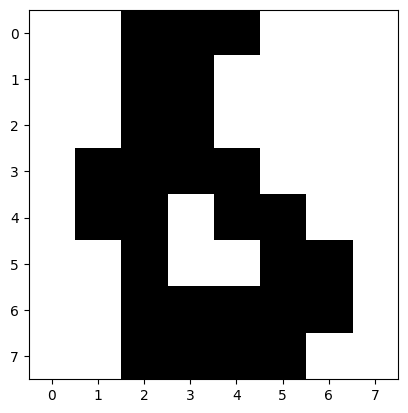

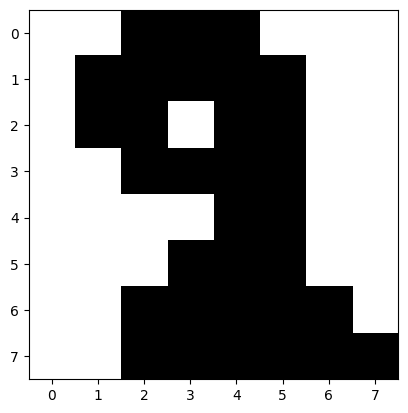

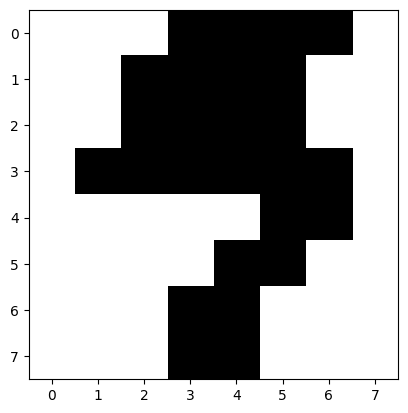

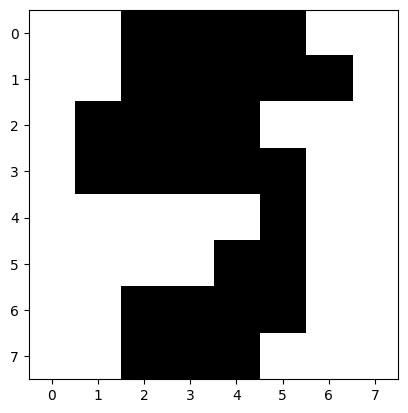

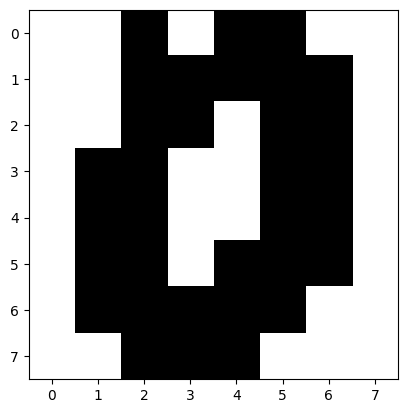

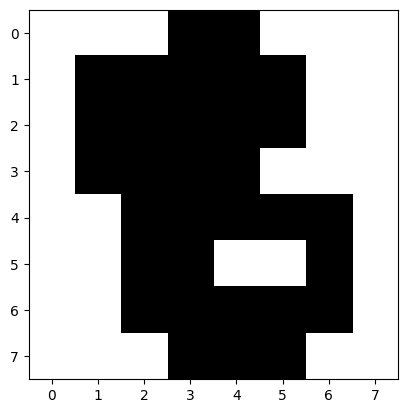

In [5]:
# Let's look at some of the observations
for index in range(10):
    for i in range(len(x[index])):
        if x[index][i] != 0:
            if x[index][i] < 4:
                x[index][i] = 0
            else:
                x[index][i] = 2
    observation = x[index].reshape(8, 8)
    plt.imshow(observation, cmap='gray_r', interpolation='nearest')
    plt.show()

## PCA steps

### (If appropriate) normalize the variables to be in the range 0-1

### Center the data

In [8]:
centered_train = train - train.mean(axis=0)

### Compute the covariance matrix

We will also visualize it.

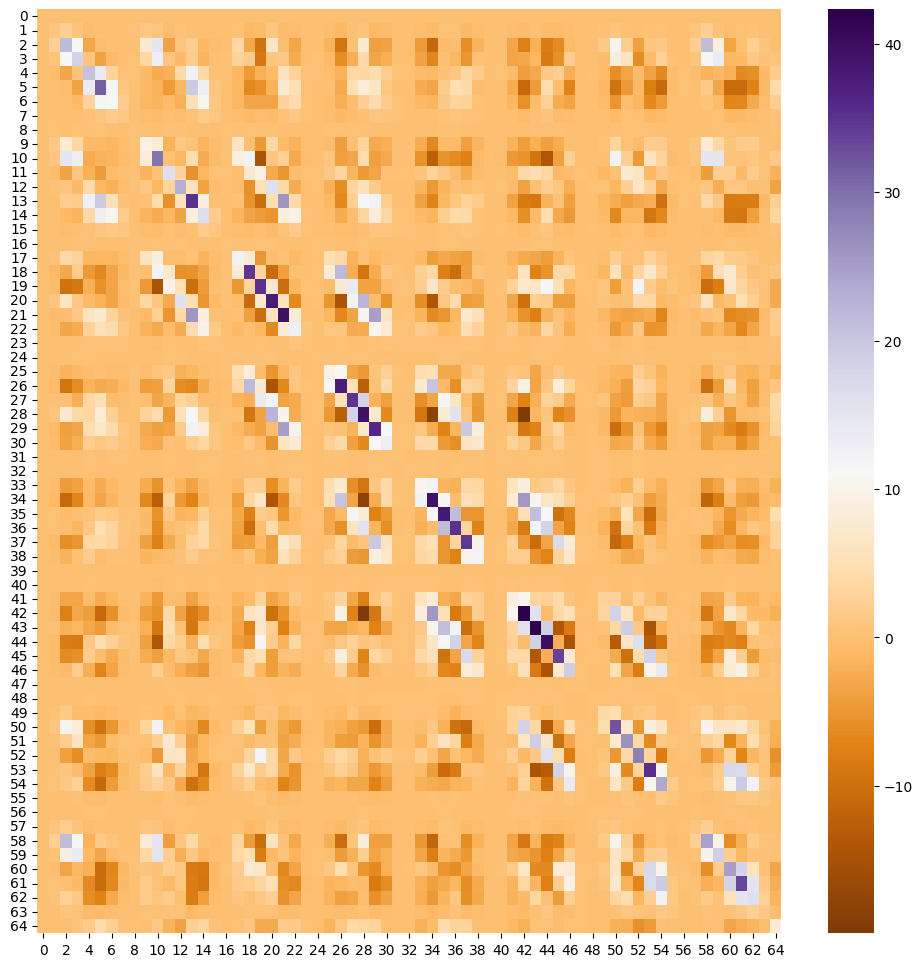

In [10]:
covariance_matrix = (centered_train.T@centered_train) / (centered_train.shape[0] - 1)

# Let's look at the covariance matrix
fig = plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame(covariance_matrix), annot=False, cmap='PuOr')
plt.show()

### Compute the eigenvectors and eigenvalues; Get an ordering over the eigenvalues; Sort the eigenvalues and eigenvectors accordingly

We will also visualize the eigenvectors.

In [12]:
evals, evectors = np.linalg.eig(covariance_matrix)

order = np.argsort(evals)[::-1]

eigenvals_sorted = evals[order]
eigenvecs_sorted = evectors[:, order]


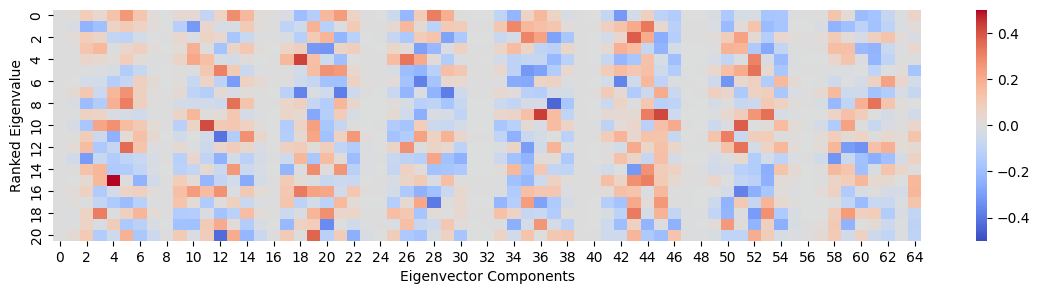

In [14]:
# We can visualize the eigenvectors, sorted by eigenvalue rank, and visually identify which eigenvector components dominate in each eigenvalue. This is essentially a visualization of what information the principal component analysis has judged most important.
fig = plt.figure(figsize=(14,3))
sns.heatmap(pd.DataFrame(eigenvecs_sorted[:, 0:21].T), 
            annot=False, cmap='coolwarm',
           vmin=-0.5,vmax=0.5)

plt.ylabel("Ranked Eigenvalue")
plt.xlabel("Eigenvector Components")
plt.show()

### Compute the proportional variance accounted for by each principal component; Compute the cumulative sum of the proportional variance

In [15]:
sum = np.sum(eigenvals_sorted)
proportional_variances = np.array([eigenvalue / sum for eigenvalue in eigenvals_sorted])
cumulative_sum = np.cumsum(proportional_variances)

### Scree and Elbow plots

These are two plots that will help you move beyond "just keep the eigenvalues that account for 90% of the variance".

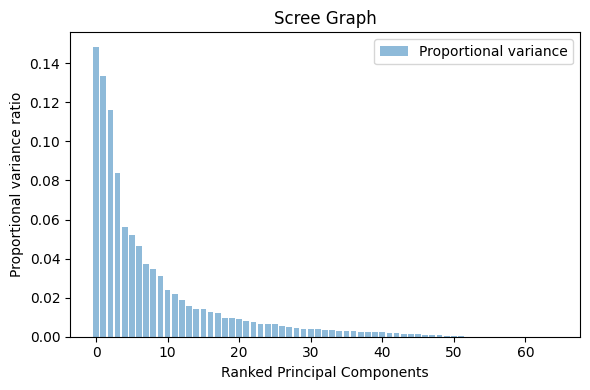

In [16]:
# Let's look at the proportional variance

plt.figure(figsize=(6, 4))

plt.bar(range(len(proportional_variances)), proportional_variances, alpha=0.5, align='center',
        label='Proportional variance')

plt.ylabel('Proportional variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph")

plt.legend(loc='best')
plt.tight_layout()

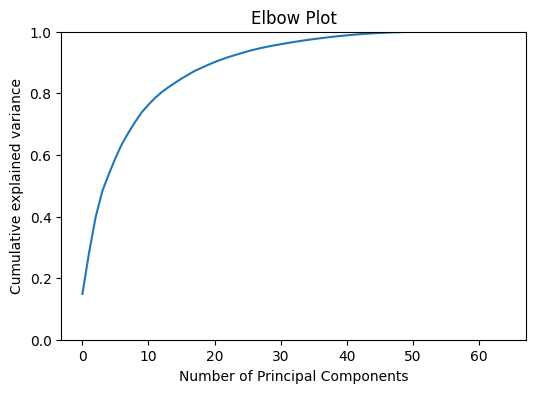

In [17]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

ax1.plot(cumulative_sum)

ax1.set_ylim([0,1.0])

ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative explained variance')
ax1.set_title('Elbow Plot')

plt.show()

*Looking at this elbow plot, how many principal components do you think we want to keep?*

### Examine the principal components and select some of them; Project the data into PCA space

In [18]:
v = eigenvecs_sorted[:, :10]
projected = centered_train@v

## Resources

* https://www.displayr.com/8-tips-for-interpreting-r-squared/